In [1]:
import sys
sys.path.append("..")

from algorithms import *
from classes.environment import Environment

import matplotlib.pyplot as plt

# Used for seed in np.random
Reproduce = 2023

In [2]:
Thetas = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1]
Qs = [1 + 0.5*i for i in range(7)]
env = Environment()

In [3]:
np.random.seed(4)
pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L, \
pi1_t, pi2_t, theta1_t, theta2_t, q1_t, q2_t, Q1, Q2 = \
simulate_episode_Qlearning(env, Qs, Thetas)

Nash test is performed

In [4]:
q1 = q1_L[-5:]
q2 = q2_L[-5:]
theta1 = theta1_L[-5:]
theta2 = theta2_L[-5:]
pi1_ep = pi1_L[-5:]
pi2_ep = pi2_L[-5:]

# Player 1 deviates
env = Environment()
action1 = Action(2, 0)
action2 = Action(q2_L[-1], theta2_L[-1])
pi1, pi2 = env.Pi(action1, action2)
q1.append(action1.q)
q2.append(action2.q)
theta1.append(action1.theta)
theta2.append(action2.theta)
pi1_ep.append(pi1)
pi2_ep.append(pi2)

# 16 episodes are played
for i in range(16):
    if i % 2:
        action1 = max(Q1[action2], key = Q1[action2].get)
    else:
        action2 = max(Q2[action1], key = Q2[action1].get)
    pi1, pi2 = env.Pi(action1, action2)
    q1.append(action1.q)
    q2.append(action2.q)
    theta1.append(action1.theta)
    theta2.append(action2.theta)
    pi1_ep.append(pi1)
    pi2_ep.append(pi2)

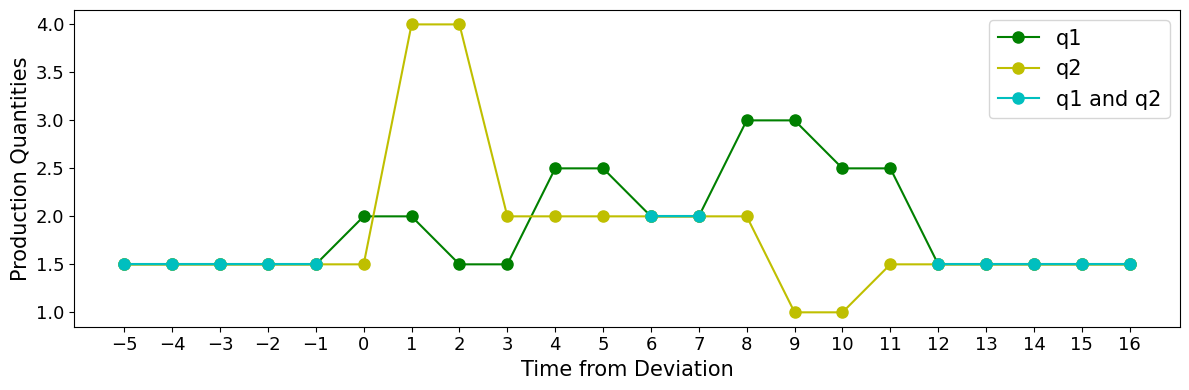

In [5]:
plt.figure(figsize=(12, 4))
x = range(-5, len(q1) - 5)

plt.plot(x, q1, 'go-', label='q1', markersize=8)
plt.plot(x, q2, 'yo-', label='q2', markersize=8)

xx = []
yy = []
for i in range(len(q1)):
    if q1[i] == q2[i]:
        xx.append(x[i])
        yy.append(q1[i])

plt.plot(xx[:5], yy[:5], 'co-', label="q1 and q2", markersize=8)
plt.plot(xx[5:7], yy[5:7], 'co-', markersize=8)
plt.plot(xx[7:], yy[7:], 'co-', markersize=8)

plt.xlabel('Time from Deviation', fontsize=15)
plt.ylabel('Production Quantities', fontsize=15)
plt.legend(fontsize=15)

plt.xticks(range(-5, len(q1) - 5), fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

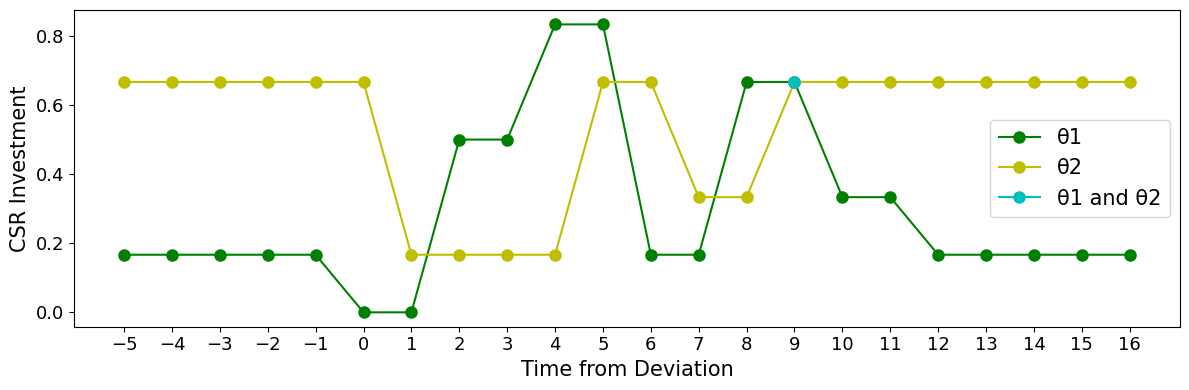

In [7]:
plt.figure(figsize=(12, 4))
x=range(-5, len(q1)-5)

plt.plot(x, theta1, 'go-', label='θ1', markersize=8)
plt.plot(x, theta2, 'yo-', label='θ2', markersize=8)
xx = []
yy = []
for i in range(len(theta1)):
    if theta1[i] == theta2[i]:
        xx.append(x[i])
        yy.append(theta1[i])
plt.plot(xx[:5], yy[:5], 'co-', label="θ1 and θ2", markersize=8)
plt.plot(xx[5:7], yy[5:7], 'co-', markersize=8)
plt.plot(xx[7:], yy[7:], 'co-', markersize=8)

plt.xlabel('Time from Deviation', fontsize=15)
plt.ylabel('CSR Investment', fontsize=15)
plt.legend(fontsize=15)

plt.xticks(range(-5, len(q1)-5), fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

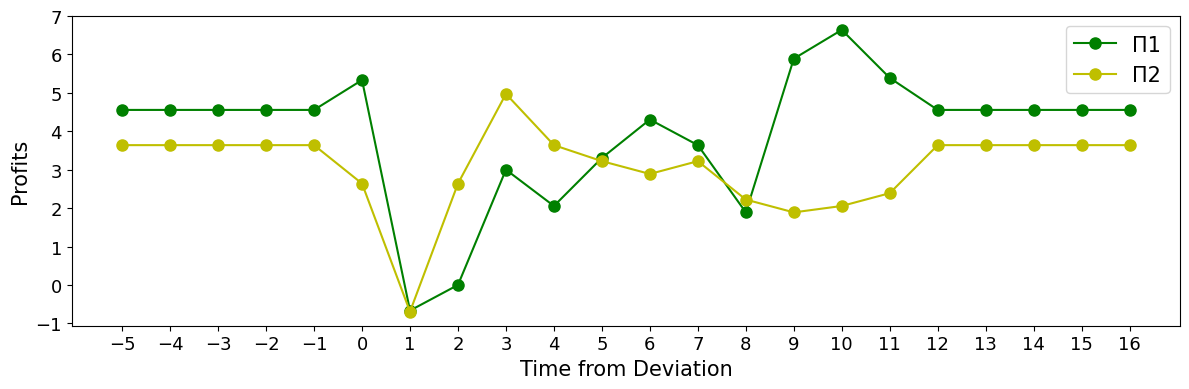

In [8]:
plt.figure(figsize=(12, 4))

x=range(-5, len(q1)-5)

plt.plot(x, pi1_ep, 'go-', label='Π1', markersize=8)
plt.plot(x, pi2_ep, 'yo-', label='Π2', markersize=8)

plt.xlabel('Time from Deviation', fontsize=15)
plt.ylabel('Profits', fontsize=15)
plt.legend(fontsize=15)

plt.xticks(range(-5, len(q1)-5), fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()